In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("Fertilizer Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [3]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [4]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

<Axes: xlabel='Soil Type', ylabel='count'>

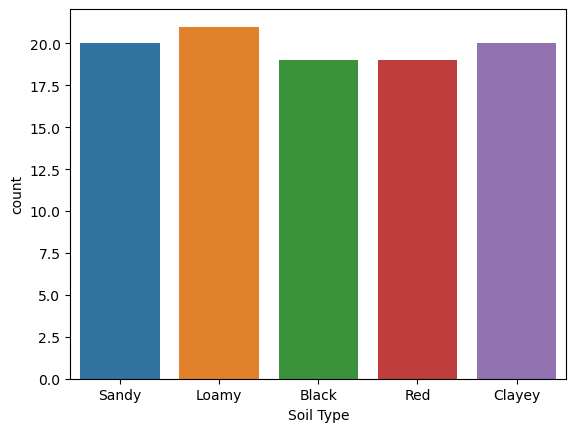

In [5]:
import seaborn as sns
sns.countplot(x='Soil Type', data = df)


<Axes: xlabel='Crop Type', ylabel='count'>

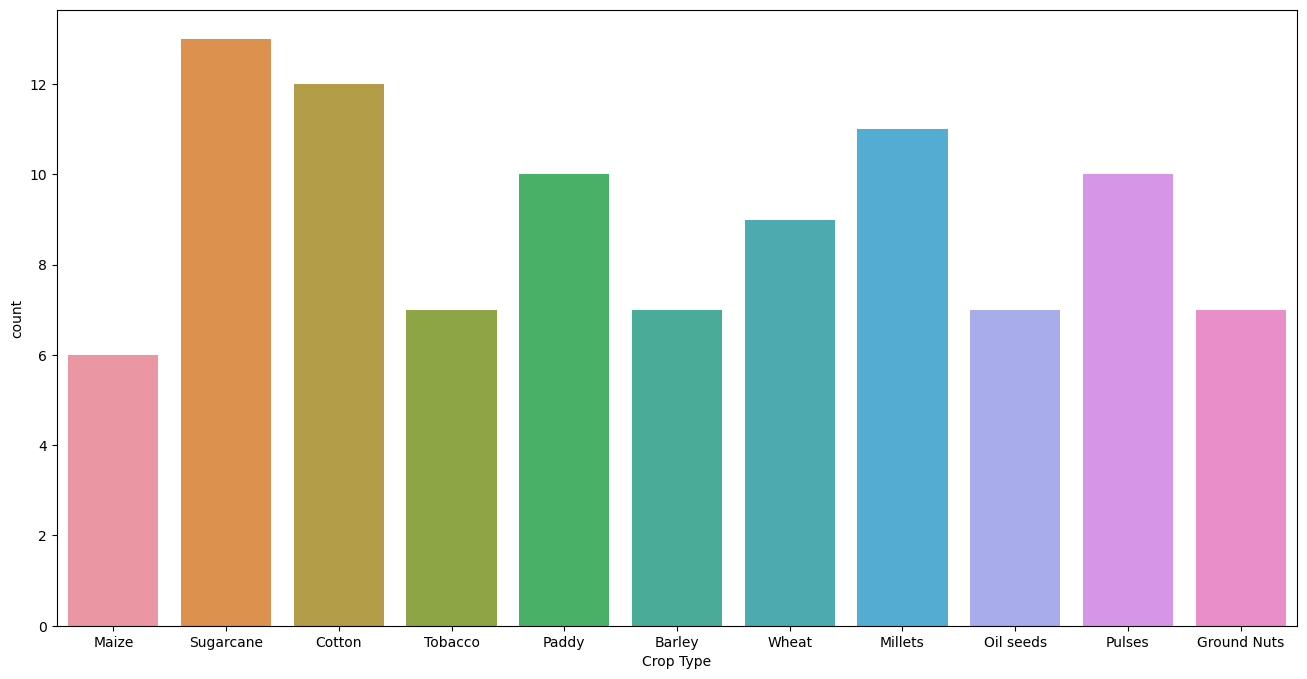

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = df)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

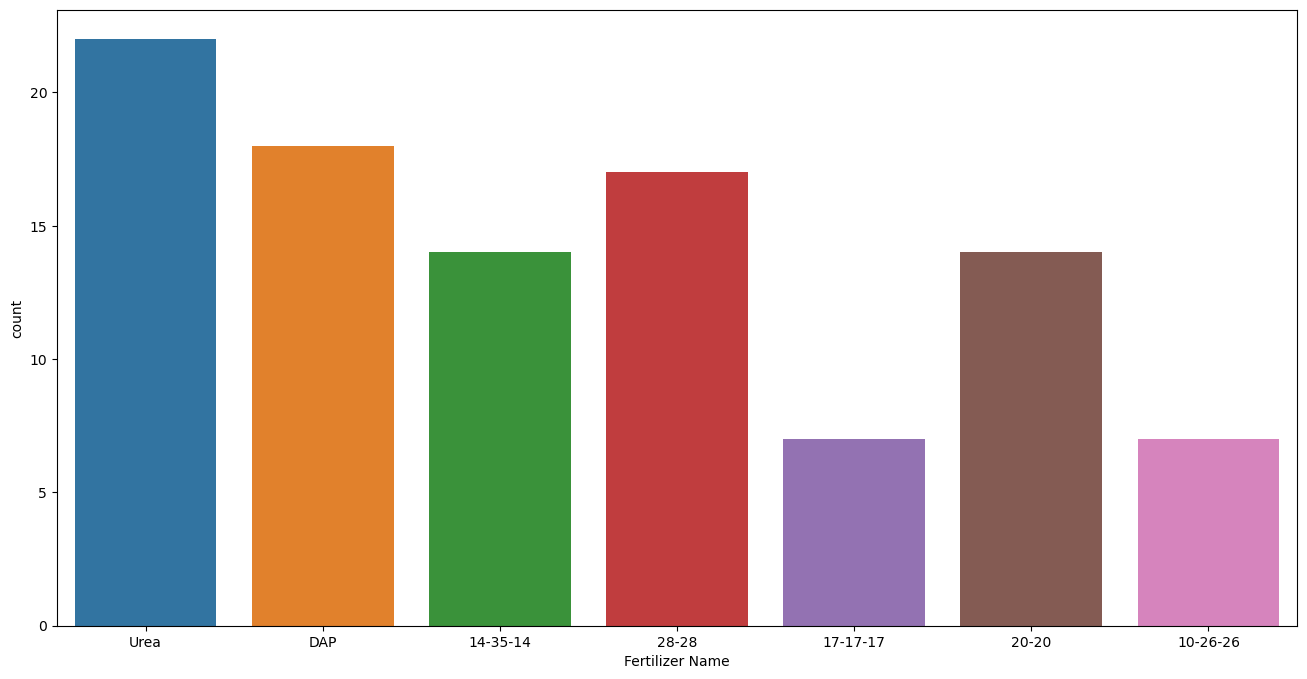

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data = df)

In [8]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])

In [50]:
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(y = x,hue = df['Fertilizer Name'], ax=axes[1])

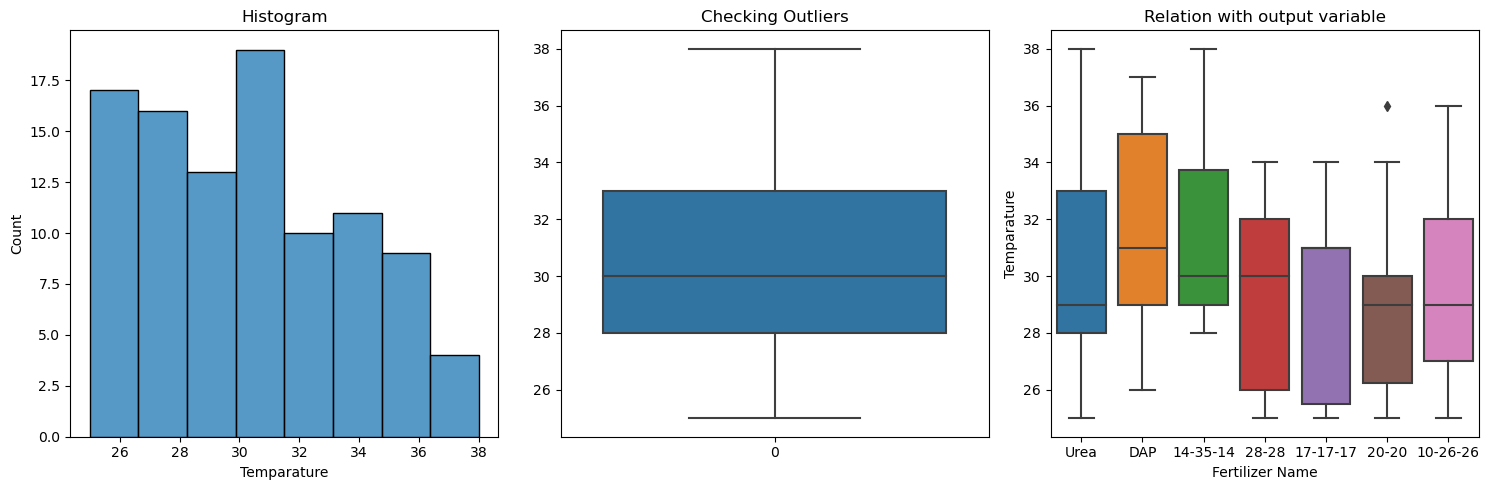

In [10]:
plot_conti(df['Temparature'])

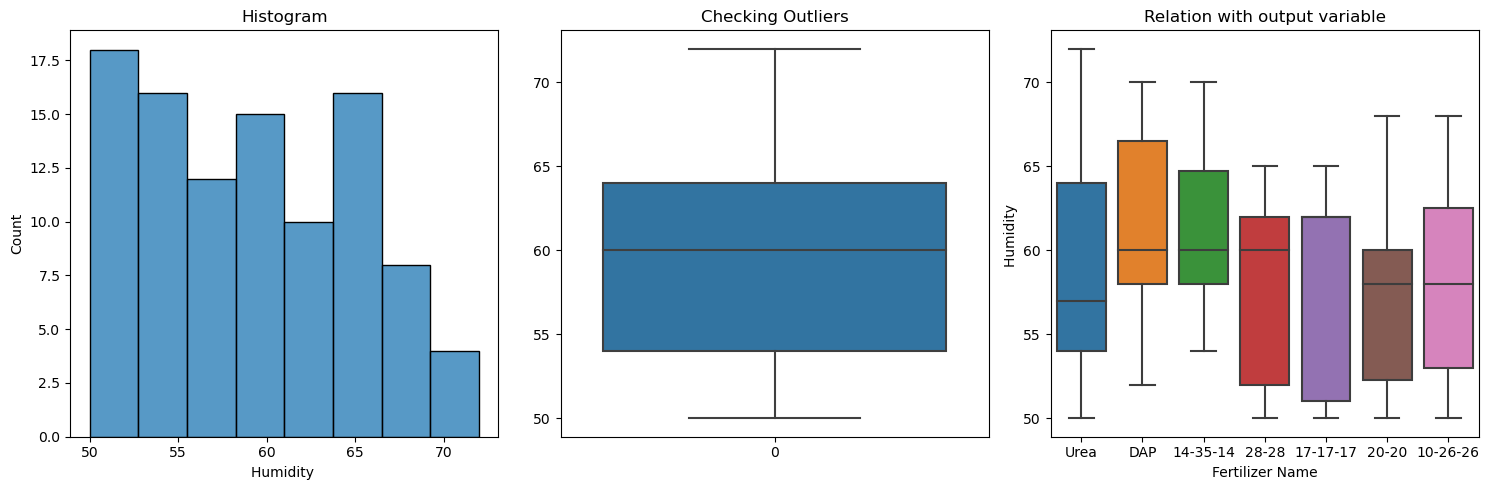

In [11]:
plot_conti(df['Humidity '])

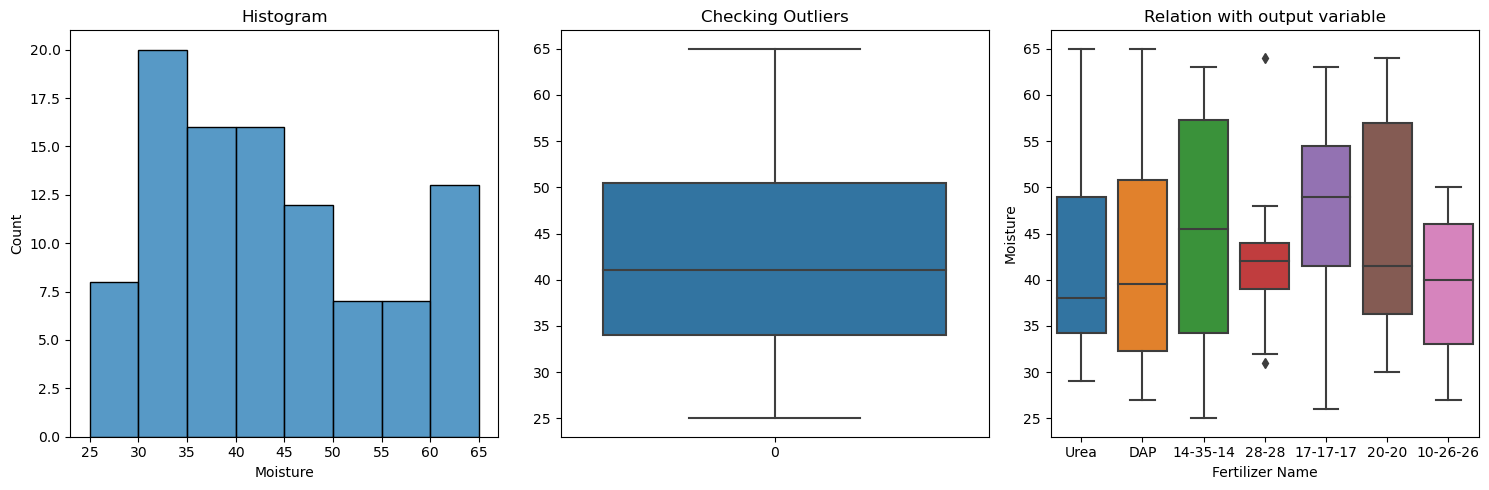

In [12]:
plot_conti(df['Moisture'])

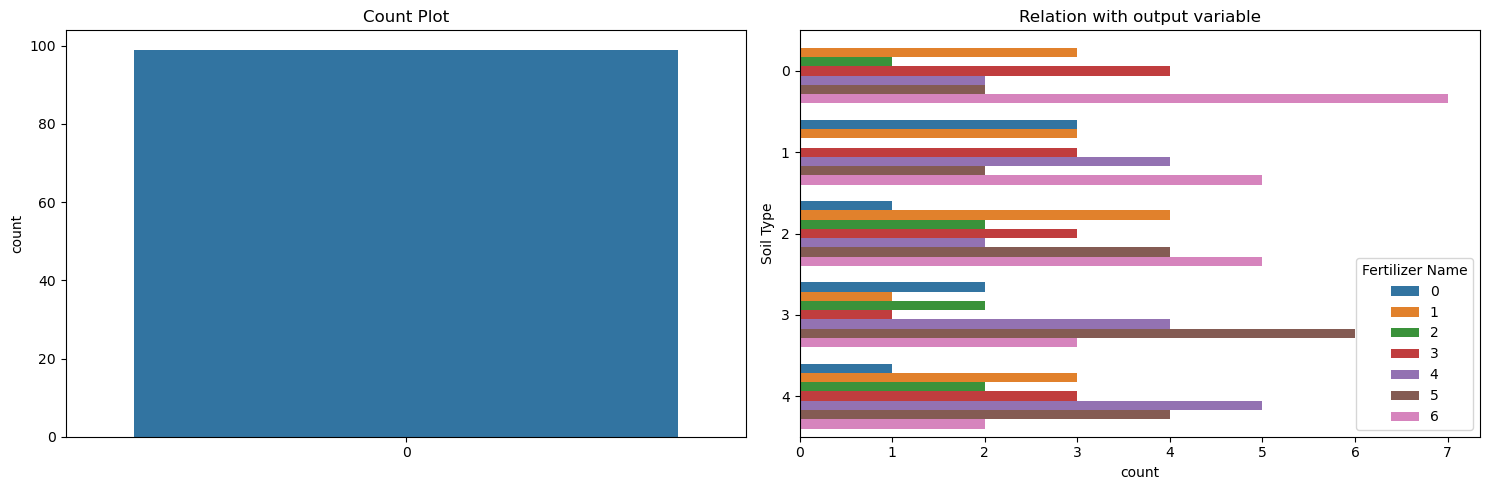

In [51]:
plot_cato(df['Soil Type'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

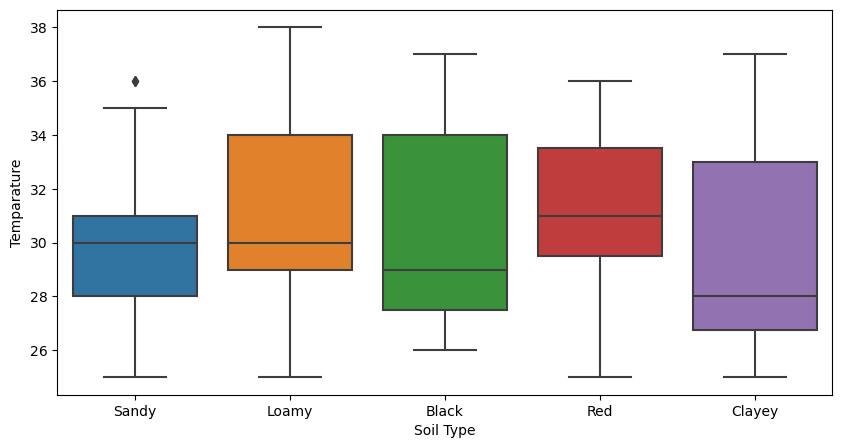

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

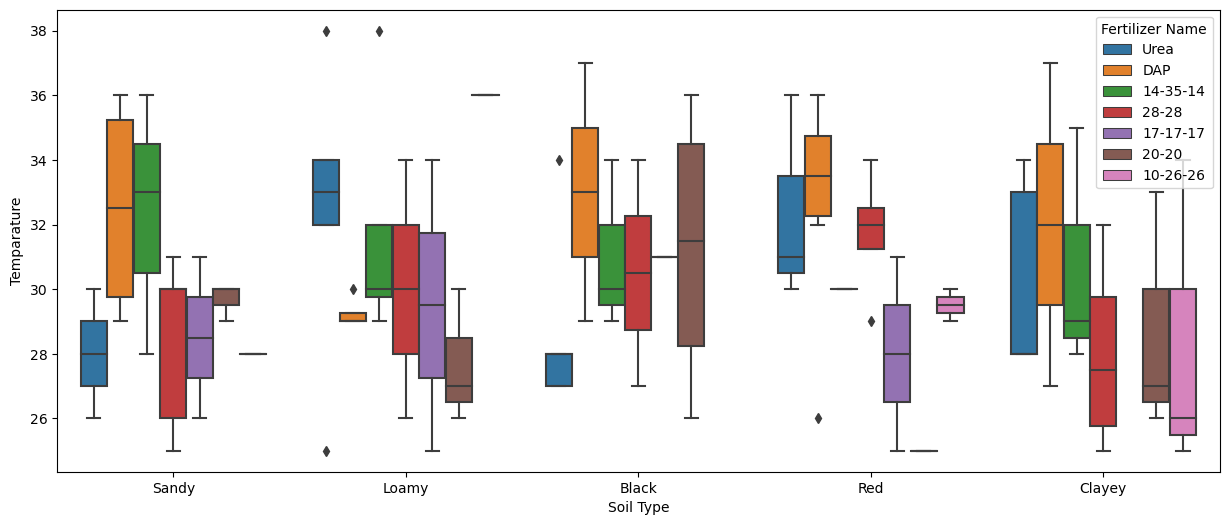

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'],hue=df['Fertilizer Name'])

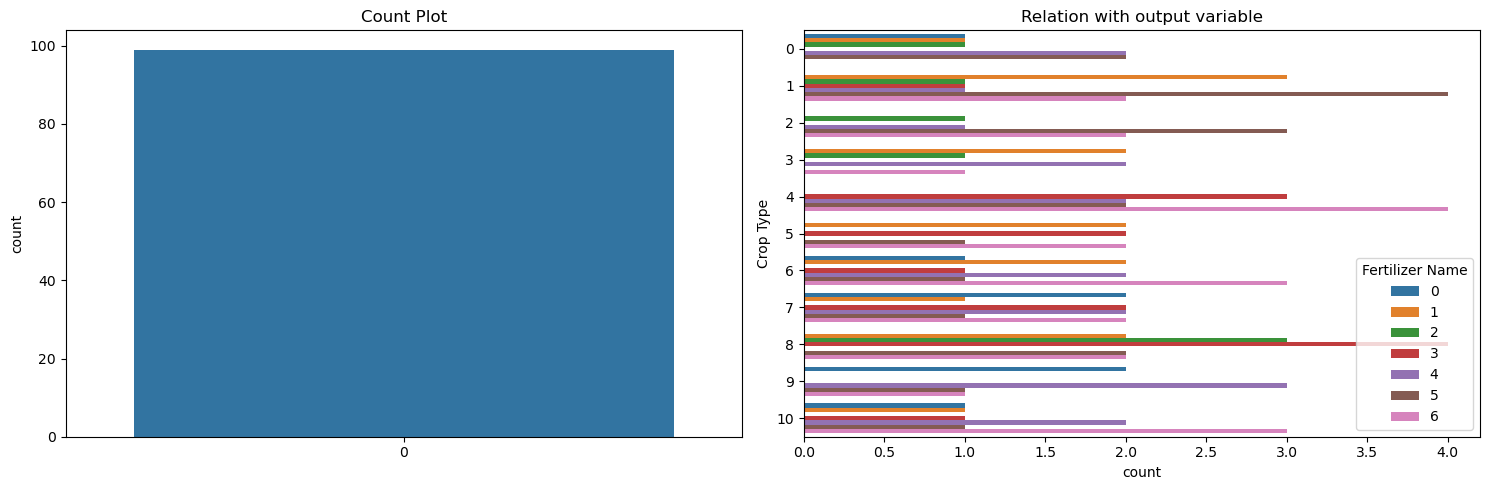

In [52]:
plot_cato(df['Crop Type'])

<Axes: xlabel='Crop Type', ylabel='Temparature'>

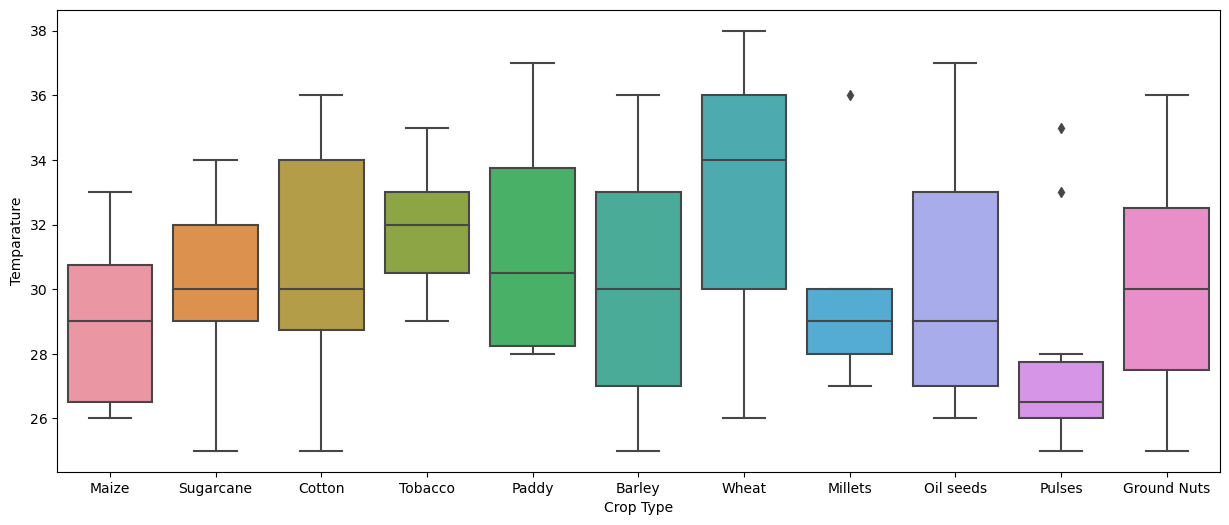

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

<Axes: xlabel='Crop Type', ylabel='Humidity '>

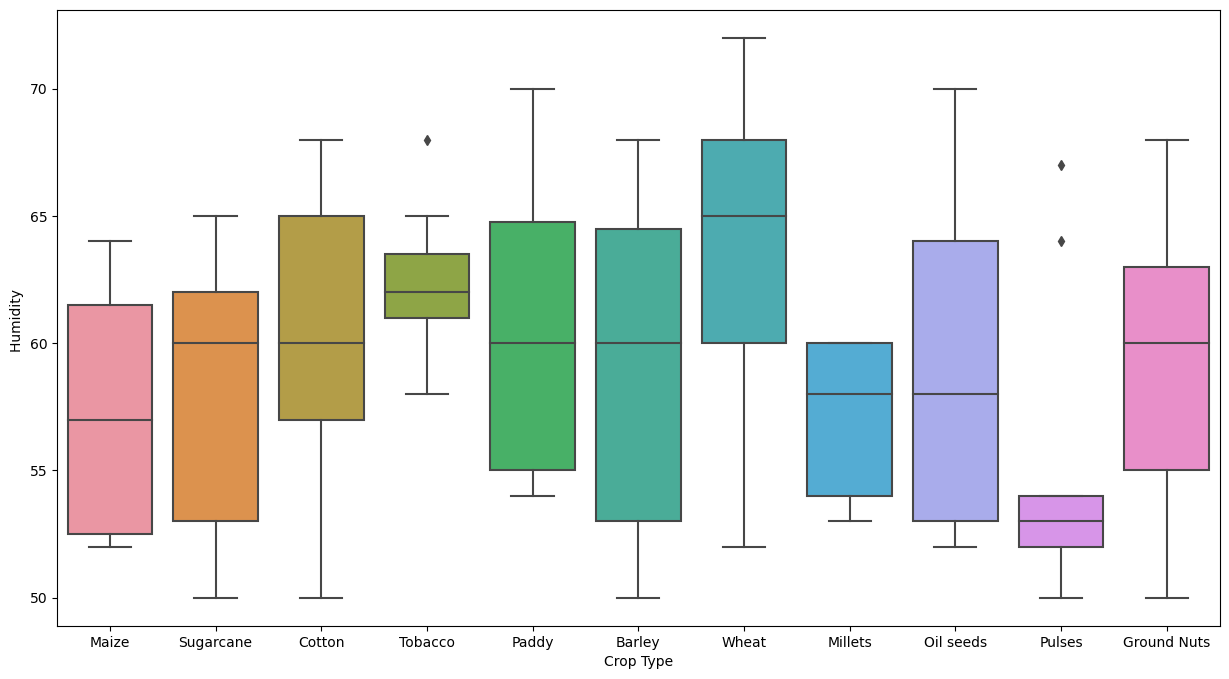

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Humidity '])

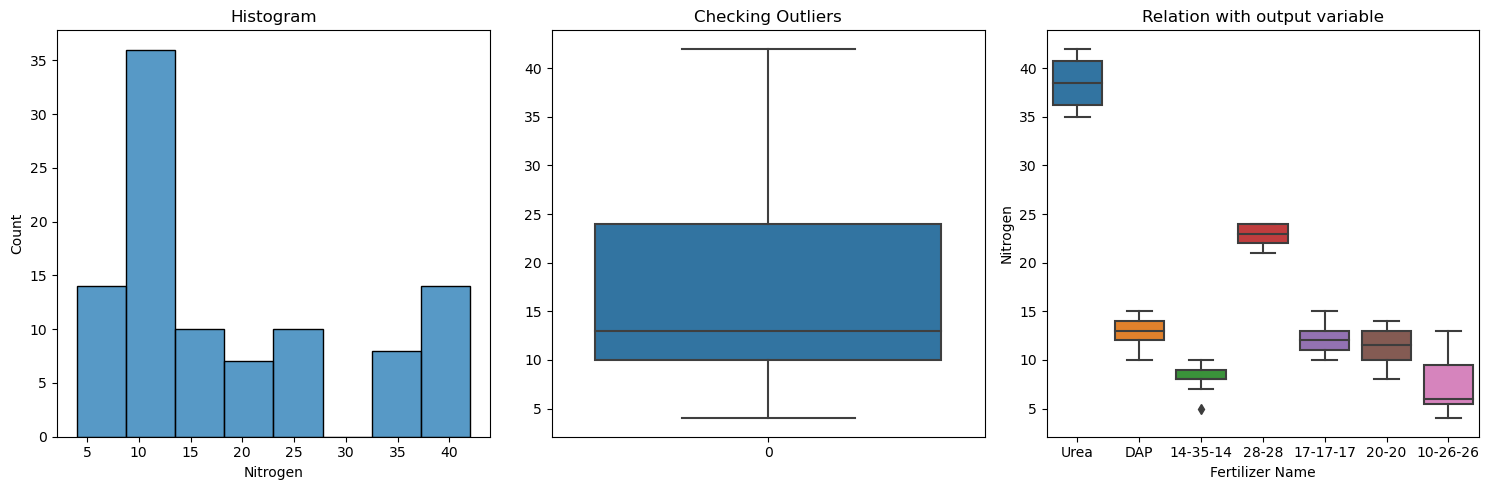

In [21]:
plot_conti(df['Nitrogen'])

<Axes: xlabel='Crop Type', ylabel='Nitrogen'>

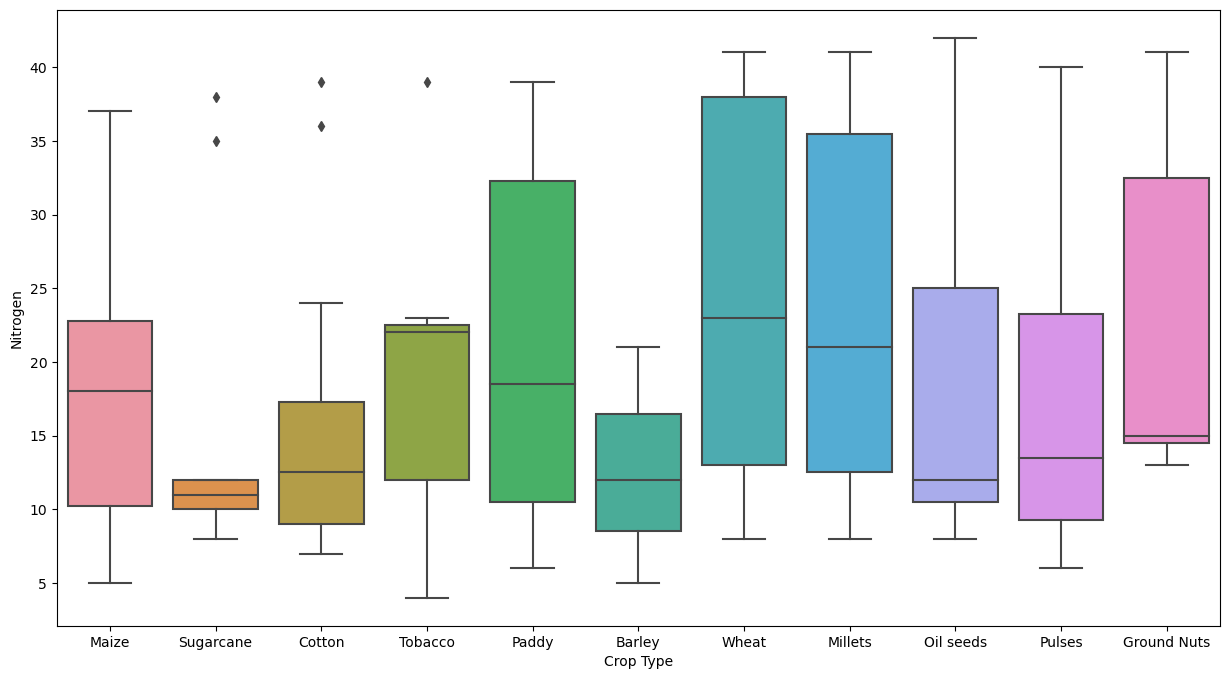

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Nitrogen'])

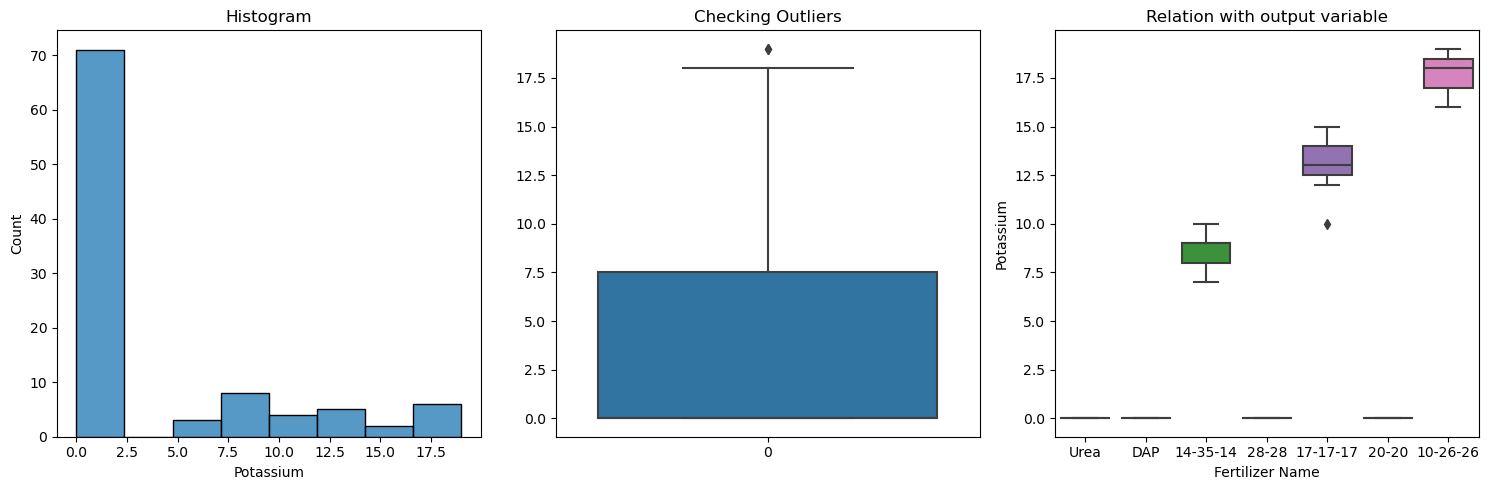

In [22]:
plot_conti(df['Potassium'])

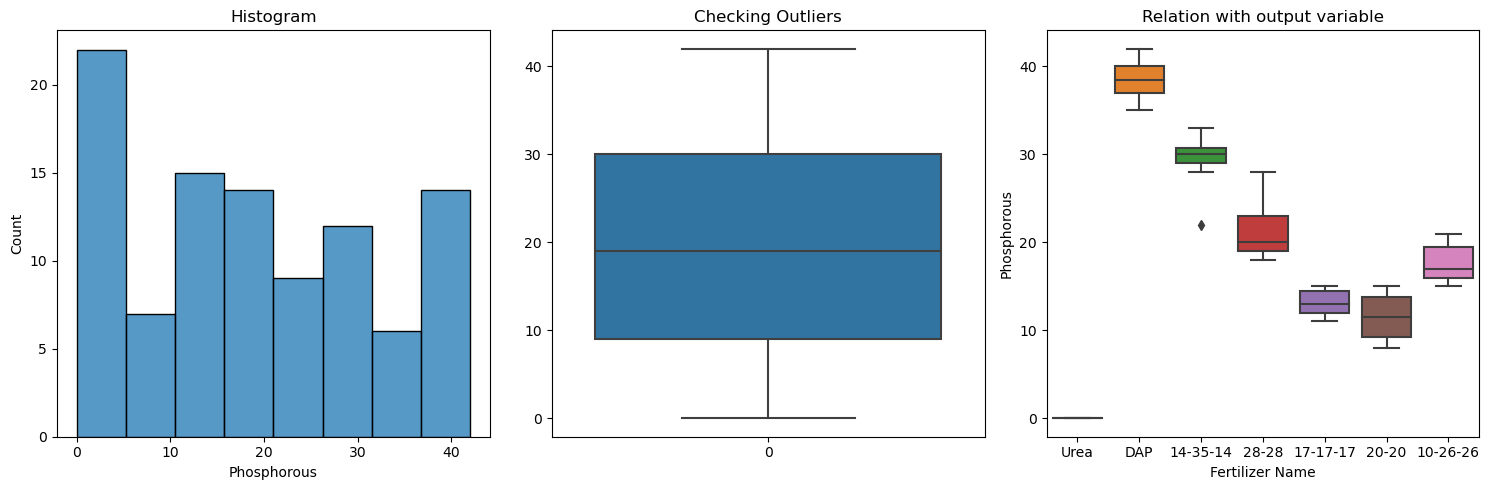

In [23]:
plot_conti(df['Phosphorous'])

In [24]:
y = df['Fertilizer Name'].copy()
X = df.drop('Fertilizer Name', axis=1).copy()

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[2 0 1 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 7 0]
 [0 0 0 0 0 0 7]]


0.9666666666666667

In [31]:
classifier.score(X_test, y_test)

0.9666666666666667

In [32]:
from sklearn.preprocessing import LabelEncoder
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

In [33]:
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
print(Soil_Type)

          Encoded
Original         
Black           0
Clayey          1
Loamy           2
Red             3
Sandy           4


In [34]:
encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

In [35]:
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
print(Crop_Type)


             Encoded
Original            
Barley             0
Cotton             1
Ground Nuts        2
Maize              3
Millets            4
Oil seeds          5
Paddy              6
Pulses             7
Sugarcane          8
Tobacco            9
Wheat             10


In [36]:
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

In [37]:

Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))


Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil Type    79 non-null     int32
 4   Crop Type    79 non-null     int32
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int32(2), int64(6)
memory usage: 4.9 KB


In [40]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [41]:
pred_rand = rand.predict(x_test)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [43]:
params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

In [53]:
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [300, 400, 500]},
             verbose=3)

In [54]:
pred_rand = grid_rand.predict(x_test)

In [55]:

print(classification_report(y_test,pred_rand))


              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20



In [56]:
print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)


Best score :  0.9748338081671415
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [57]:
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [58]:
model = pickle.load(open('classifier.pkl','rb'))
ans = model.predict([[34,65,62	,0,	1,	7,	9,	30]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17	")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("Urea")


14-35-14


In [59]:
def get_user_input():

    temperature = float(input("Enter the temperature (°C): "))
    humidity = float(input("Enter the humidity (%): "))
    ph = float(input("Enter the pH level of the soil: "))
    rainfall = float(input("Enter the rainfall (mm): "))
    crop_name = input("Enter the crop name: ")
    N = float(input("Enter the current Nitrogen (N) level: "))
    P = float(input("Enter the current Phosphorus (P) level: "))
    K = float(input("Enter the current Potassium (K) level: "))

    current_conditions = {
        'temperature': temperature,
        'humidity': humidity,
        'ph': ph,
        'rainfall': rainfall,
        'Crop Name': crop_name,
        'N': N,
        'P': P,
        'K': K
    }

    return current_conditions

In [60]:
def predict_and_recommend(pipeline, current_conditions):

    # Convert current conditions dictionary to DataFrame
    conditions_df = pd.DataFrame([current_conditions])

    predicted_nutrients = pipeline.predict(conditions_df)

    # Check if predictions are in the expected shape
    if predicted_nutrients.ndim == 1:

        # If only one value is returned (e.g., for single output regression)
        predicted_nutrients = np.expand_dims(predicted_nutrients, axis=0)

    current_nutrients = np.array([current_conditions['N'], current_conditions['P'], current_conditions['K']])

    additional_amounts = predicted_nutrients - current_nutrients

    # Ensure additional_amounts is a 2D array
    if additional_amounts.ndim == 1:
        additional_amounts = np.expand_dims(additional_amounts, axis=0)

    extra_N, extra_P, extra_K = additional_amounts[0]

    result = {}
    suggestions = []


    if extra_N > 0 and extra_P > 0 and extra_K > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_N:.2f} kg/ha of N, {extra_P:.2f} kg/ha of P, and {extra_K:.2f} kg/ha of K.\nSuggestions:\nUse kelp or seaweed-based fertilizers to supply potassium and trace minerals.\nApply well-aged compost to provide a balanced mix of nutrients and improve soil fertility.\nUse organic manure (e.g., cow, chicken, or horse manure) to supplement N, P, and K levels naturally. ")
    elif extra_N > 0 and extra_P > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_N:.2f} kg/ha of N and {extra_P:.2f} kg/ha of P.\nSuggestions:\nUse wood ash to increase potassium levels and improve soil structure. Apply it sparingly to avoid excessive alkalinity.\nIncorporate composted organic materials to gradually supply both phosphorus and potassium, along with other essential nutrients.\nApply kelp meal or seaweed extracts to provide a natural source of potassium and trace minerals.")
    elif extra_N > 0 and extra_K > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_N:.2f} kg/ha of N and {extra_K:.2f} kg/ha of K.\nSuggestions:\nUse compost or well-rotted manure, which provides a balanced supply of nutrients, including nitrogen and potassium.\nAdd natural sources of potassium, such as wood ash, seaweed, or potassium-rich rock minerals (e.g., greensand).\nRotate crops to include nitrogen-fixing plants and those that benefit from increased potassium to balance nutrient levels over time.")
    elif extra_P > 0 and extra_K > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_P:.2f} kg/ha of P and {extra_K:.2f} kg/ha of K.\nSuggestions:\nBury or compost banana peels, which are an excellent source of potassium, to naturally boost potassium levels in the soil.\nUse well-composted animal manure, which provides both phosphorus and potassium, along with other essential nutrients.\nApply rock phosphate for a natural and long-lasting phosphorus source that enhances soil fertility over time.")
    elif extra_N > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_N:.2f} kg/ha of N.\nSuggestions:\nPlant legumes like beans, peas, or clover that have symbiotic bacteria in their roots to fix atmospheric nitrogen into the soil.\nSow green manures (e.g., alfalfa, hairy vetch) to add nitrogen to the soil when tilled back in.\nUse organic nitrogen-rich fertilizers like blood meal, fish emulsion, or feather meal to increase soil nitrogen levels.")
    elif extra_P > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_P:.2f} kg/ha of P.\nSuggestions:\nAdd bone meal, a slow-release organic fertilizer rich in phosphorus, to improve P levels in the soil.\nUse rock phosphate, a natural mineral that provides a slow, steady release of phosphorus.\nIncorporate well-decomposed compost and animal manure, which can gradually increase phosphorus content.\n")
    elif extra_K > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_K:.2f} kg/ha of K.\nSuggestions:\nApply wood ash, as it is rich in potassium and acts as a quick-release organic source.\nIncorporate compost made from banana peels, which are naturally high in potassium.\nUse seaweed-based fertilizers or extracts that provide potassium along with trace minerals.")


    if extra_N <= 0:
        suggestions.append("\nRecommendations: \nN is more than expected or no extra N needed.\nSuggestions:\nApply high-carbon materials like straw to balance nitrogen.\nIntroduce nitrogen-fixing cover crops like legumes (e.g., clover, alfalfa, or beans) in crop rotation.\nReduce irrigation or manage it more carefully to prevent excess nitrogen from leaching deeper into the soil.")
    if extra_P <= 0:
        suggestions.append("\nRecommendations: \nP is more than expected or no extra P needed.\nSuggestions:\nUse manures low in phosphorus and balance nutrients with compost.\n Incorporate compost, leaf litter, or well-rotted manure to balance nutrients and encourage microbial activity that helps absorb excess phosphorus.\n Plant species like lupine or beans that help bind phosphorus in the soil, making it less available to other plants.")
    if extra_K <= 0:
        suggestions.append("\nRecommendations: \nK is more than expected or no extra K needed.\nSuggestions:\nIncorporate compost or well-rotted manure to balance soil nutrients and improve soil structure.\nApply organic mulch, such as straw or leaves, to reduce potassium leaching and improve soil health.\nPlant cover crops like clover or legumes to help absorb excess potassium and improve soil nutrient balance.")

    result['suggestions'] = suggestions

    return result

if __name__ == "__main__":
    current_conditions = get_user_input()
    recommendations = predict_and_recommend(pipeline, current_conditions)
    print("\n".join(recommendations['suggestions']))

Enter the temperature (°C): 25
Enter the humidity (%): 20
Enter the pH level of the soil: 6
Enter the rainfall (mm): 200
Enter the crop name: wheat
Enter the current Nitrogen (N) level: 10
Enter the current Phosphorus (P) level: 20
Enter the current Potassium (K) level: 30


NameError: name 'pipeline' is not defined